In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

In [58]:
data = pd.read_csv('Result.csv')

In [59]:
data

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
455,75R025,South Richmond High School,10.0,407.0,421.0,400.0
456,75X012,PS12X LEWIS AND CLARK SCHOOL,NaN,NaN,NaN,NaN
457,75X754,P754 X - Jeffrey M. Rapport School for Career ...,NaN,NaN,NaN,NaN
458,76K460,John Jay High School,9.0,390.0,381.0,398.0


In [60]:
nulled_data = data[(pd.isnull(data['Critical Reading Mean'])) &
                   (pd.isnull(data['Number of Test Takers'])) &
                   (pd.isnull(data['Mathematics Mean'])) &
                   (pd.isnull(data['Writing Mean']))]
nulled_data

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
21,02M376,NYC iSchool,NaN,NaN,NaN,NaN
37,02M445,Seward Park High School,NaN,NaN,NaN,NaN
41,02M473,YABC at Washington Irving High School,NaN,NaN,NaN,NaN
49,02M535,Park West High School,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
452,75M035,MANHATTAN HIGH SCHOOL - P35M,NaN,NaN,NaN,NaN
453,75Q004,P4Q SCHOOL (@ 179),NaN,NaN,NaN,NaN
454,75Q256,P256 QUEENS SCHOOL @ SAINT MARY'S,NaN,NaN,NaN,NaN
456,75X012,PS12X LEWIS AND CLARK SCHOOL,NaN,NaN,NaN,NaN


In [61]:
data = data[~data.index.isin(nulled_data.index)]

In [62]:
df = data.drop(columns=['DBN','School Name'])
df

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,31.0,391.0,425.0,385.0
1,60.0,394.0,419.0,387.0
2,69.0,418.0,431.0,402.0
3,26.0,385.0,370.0,378.0
5,154.0,314.0,532.0,314.0
...,...,...,...,...
448,29.0,394.0,420.0,395.0
449,30.0,357.0,345.0,351.0
455,10.0,407.0,421.0,400.0
458,9.0,390.0,381.0,398.0


In [63]:
data.describe()

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
count,386.000000,386.000000,386.000000,386.000000
mean,103.658031,404.248705,412.935233,397.689119
std,145.264496,56.815631,64.990976,57.762584
min,7.000000,291.000000,281.000000,285.000000
25%,35.000000,370.000000,372.000000,364.000000
50%,54.000000,392.500000,394.500000,383.000000
75%,92.750000,419.000000,429.750000,414.000000
max,1047.000000,674.000000,735.000000,678.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DBN                    386 non-null    object 
 1   School Name            386 non-null    object 
 2   Number of Test Takers  386 non-null    float64
 3   Critical Reading Mean  386 non-null    float64
 4   Mathematics Mean       386 non-null    float64
 5   Writing Mean           386 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.1+ KB


In [65]:
data.head()

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0


In [66]:
df = data.drop(columns=['DBN','School Name'])
df

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,31.0,391.0,425.0,385.0
1,60.0,394.0,419.0,387.0
2,69.0,418.0,431.0,402.0
3,26.0,385.0,370.0,378.0
5,154.0,314.0,532.0,314.0
...,...,...,...,...
448,29.0,394.0,420.0,395.0
449,30.0,357.0,345.0,351.0
455,10.0,407.0,421.0,400.0
458,9.0,390.0,381.0,398.0


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

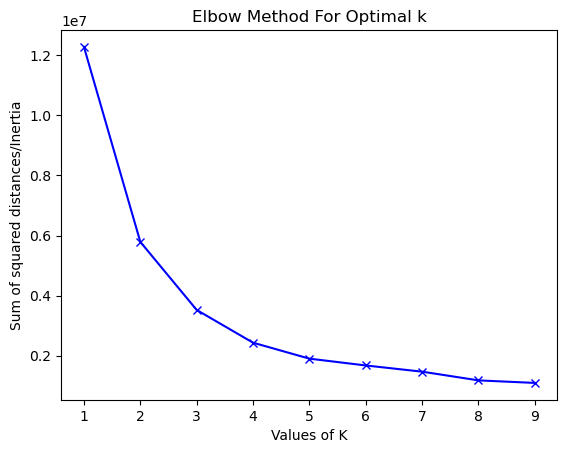

In [67]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters,n_init="auto")
 kmeans.fit(df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [68]:
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster,n_init="auto")
kmeans.fit(df)

C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [69]:
data = data.copy()
nulled_data = nulled_data.copy()
data['Cluster'] = kmeans.labels_
df['Cluster'] = kmeans.labels_
nulled_data['Cluster']= 3
data = pd.concat([data, nulled_data], ignore_index=True)


cluster_counts = data.groupby('Cluster').size()
cluster_counts

Cluster
0     66
1    304
2     16
3     74
dtype: int64

In [70]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, kmeans.labels_)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.6054847156068714


In [71]:
df

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean,Cluster
0,31.0,391.0,425.0,385.0,1
1,60.0,394.0,419.0,387.0,1
2,69.0,418.0,431.0,402.0,1
3,26.0,385.0,370.0,378.0,1
5,154.0,314.0,532.0,314.0,1
...,...,...,...,...,...
448,29.0,394.0,420.0,395.0,1
449,30.0,357.0,345.0,351.0,1
455,10.0,407.0,421.0,400.0,1
458,9.0,390.0,381.0,398.0,1


C:\Users\Adewale Oguntola\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


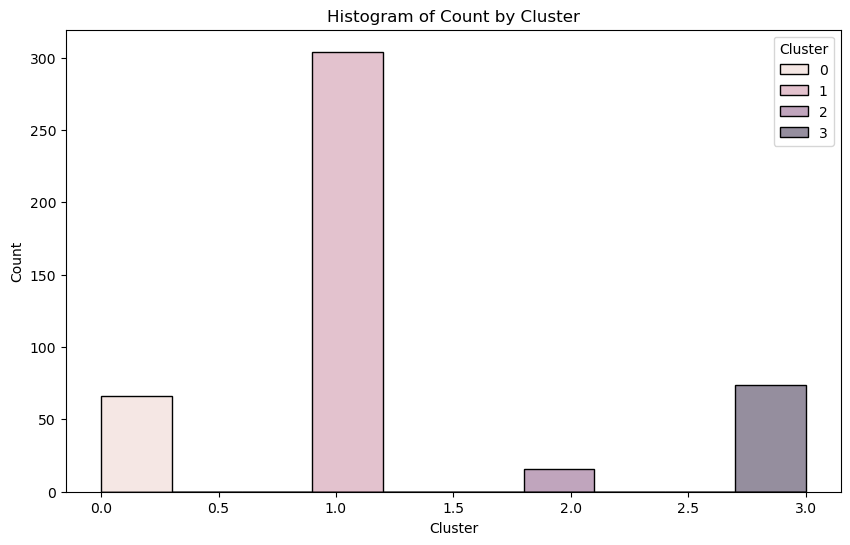

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Cluster',hue='Cluster')
plt.title(f'Histogram of Count by Cluster')
plt.xlabel("Cluster")
plt.ylabel("Count")

plt.show()

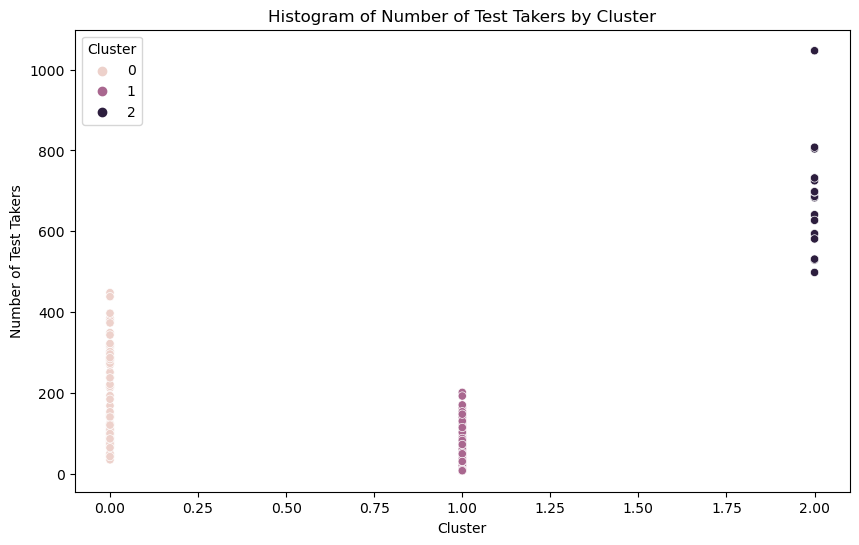

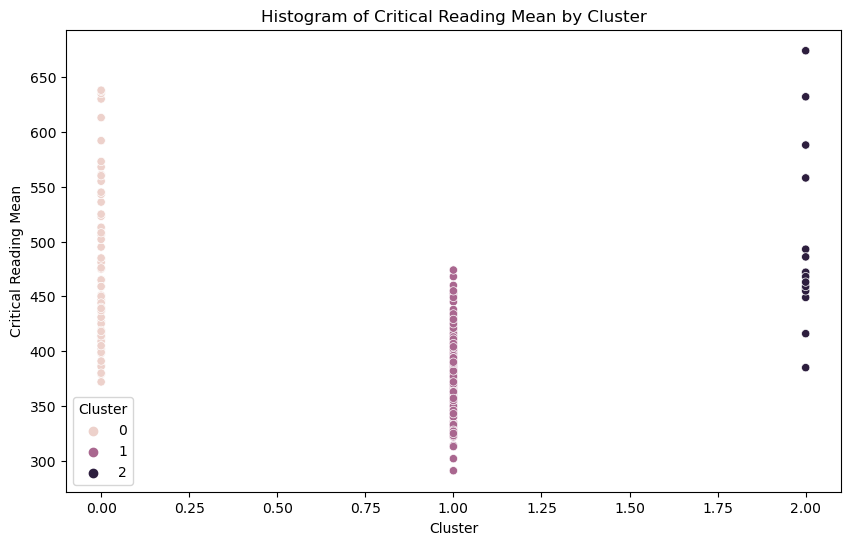

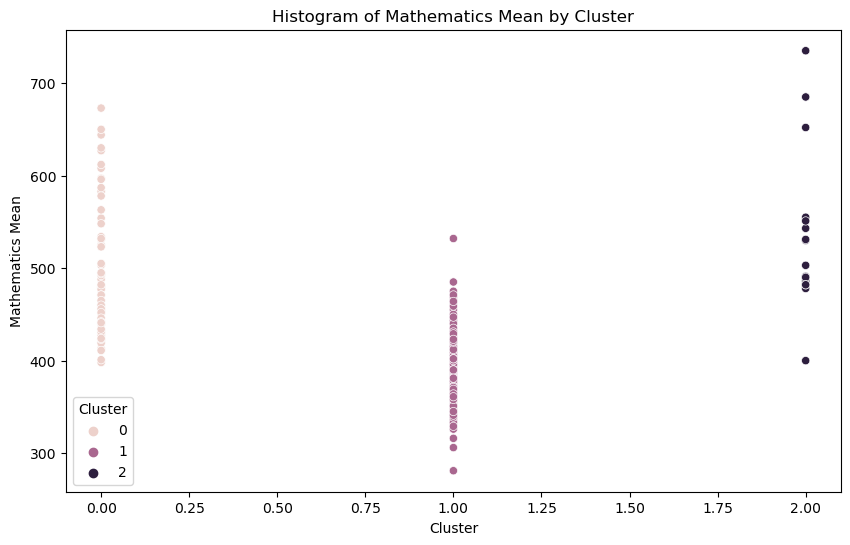

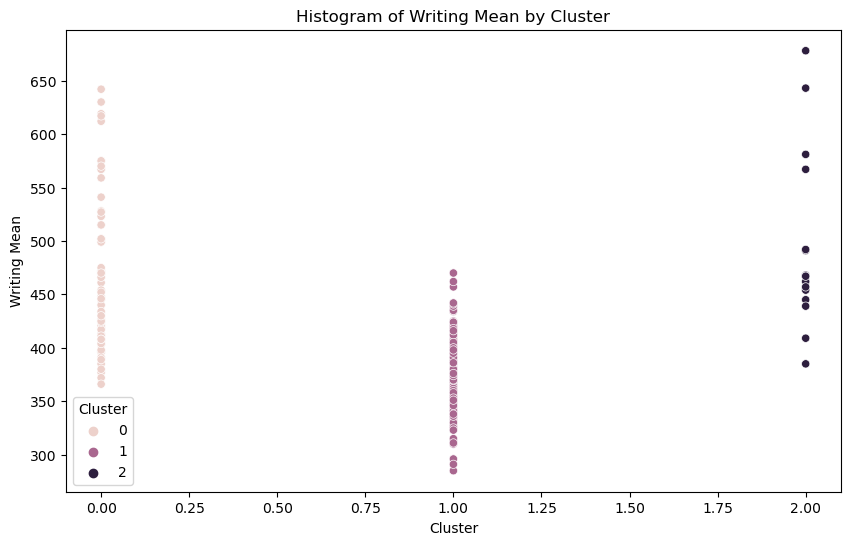

In [73]:
columns_to_plot = df.columns[df.columns != 'Cluster']

# Loop through each column and plot a histogram for each cluster
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Cluster',y=column,hue='Cluster')
    plt.title(f'Histogram of {column} by Cluster')
    plt.xlabel("Cluster")
    plt.ylabel(column)
    plt.show()